# **A. Pengelompokan Dataset dengan k-Means**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

mall_customers = pd.read_csv('Mall_Customers.csv')

gender = mall_customers.Gender
age = mall_customers.Age
gender = mall_customers.Gender
income = mall_customers['Annual Income (k$)']
spending_score = mall_customers['Spending Score (1-100)']

Saving Mall_Customers.csv to Mall_Customers.csv


# **Scatter plot Age vs Spending Score**


Berdasarkan scatter plot yang dihasilkan, dapat dilihat bahwa orang dengan rentang usia <= 40 tahun, memiliki spending score yang lebih tinggi dan variatif dibanding dengan orang dengan rentang usia >40 tahun yang spending scorenya cendereung lebih rendah dan kurang variatif.

Tetapi tidak ada perubahan yang linear bertahap (naik atau turun) antara umur dengan spending score, tetapi perubahan yang drastis saat usia melebihi 40 tahun.

Kesimpulan : terdapat korelasi negatif antara Age dan Spending Score, tetapi bukan menunjukan pola garis lurus turun, melainkan penurunan drastis spending score setelah melewati umur tertentu.

Text(0, 0.5, 'spending_score')

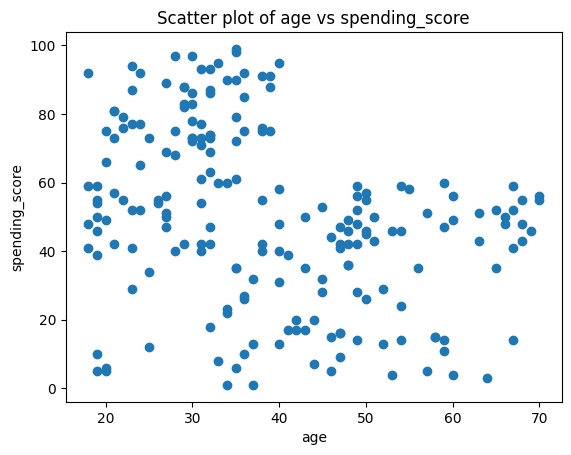

In [ ]:
plt.scatter(age, spending_score)

min(spending_score), max(spending_score)
# spending score tidak perlu dinormalisasi karena range datanya tidak luas
plt.title('Scatter plot of age vs spending_score')
plt.xlabel('age')
plt.ylabel('spending_score')

# **Scatter plot Age vs Income**


Berdasarkan scatter plot yang dihasilkan, dapat dilihat bahwa hubungan usia dengan income tidak memiliki korelasi karena data yang ditampilkan terlalu acak. Tidak membentuk korelasi linear, baik naik atau turun, maupun korelasi non linear.

15 137


Text(0, 0.5, 'income')

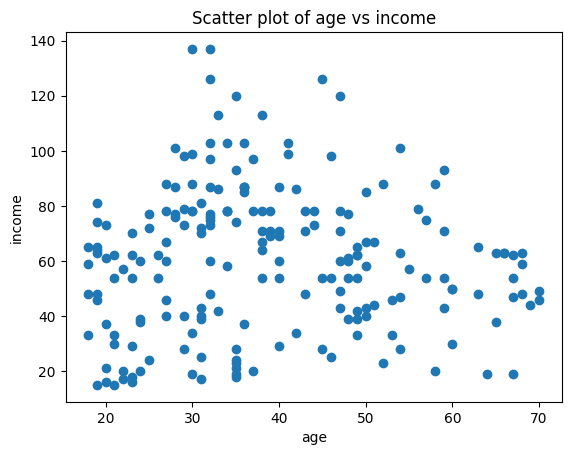

In [ ]:
plt.scatter(age, income)
min(income), max(income)
# income tidak perlu dinormalisasi karena range datanya tidak luas

plt.title('Scatter plot of age vs income')
plt.xlabel('age')
plt.ylabel('income')

# **Scatter plot Income vs Spending Score**


Berdasarkan scatter plot yang dihasilkan, dapat dilihat bahwa orang dengan rentang 40 <= Income <=70 ribu dollar per tahun, memiliki ragam spending score yang lebih kecil (tidak beragam) atau tidak variatif dibanding dengan kelompok lainnya berdasarkan income, yang lebih variatif nilai spending scorenya.

Tetapi tidak ada perubahan yang linear garis lurus (naik atau turun) antara income dengan spending score, terbentuk pola seperti X.

Kesimpulan : terdapat korelasi non linear antara income dengan spending score.

15 137
1 99


Text(0, 0.5, 'spending_score')

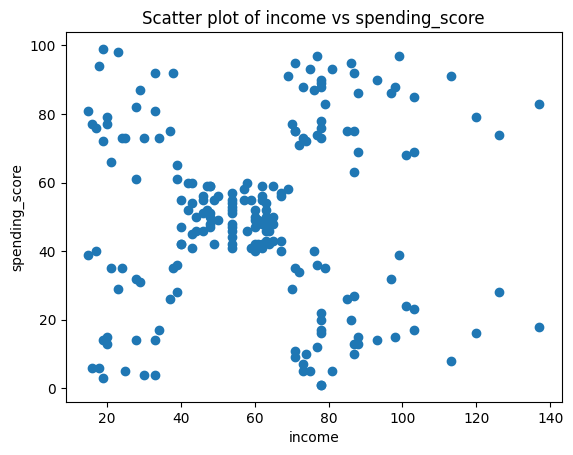

In [ ]:
plt.scatter(income, spending_score)
print(min(income), max(income))
print(min(spending_score), max(spending_score))
# income dan spendign score tidak perlu dinormalisasi karena range datanya luas
plt.title('Scatter plot of income vs spending_score')
plt.xlabel('income')
plt.ylabel('spending_score')

# **Kesimpulan Sactter Plot Antara Variable Numerik**
1. Kolom-kolom mana saja yang menunjukkan adanya korelasi?
  - Kolom Age dengan Spending score karena teradpat perubahan drastis di suatu titik yang mengindikasikan teradapt hungan anatara kolom ini.
  - Kolom Income dengan Spending score karena data berbentuk pola X, sehingga kemungkinan besar terdapat 2 kelompok besar data, yang berkumpul di suatu titik (atau range) dan di luar titik (atau range) tersebut.
2. Kolom-kolom mana yang cocok dipilih sebagai fitur clustering?
 - Kolom yang memiliki korelasi, age dengan spending score ATAU income dengan spending score dengan alasan yang sudah dipaparkan pada point sebelumnya.
3. Apakah perbedaan rentang nilai antar atribut terlalu besar dan perlu dinormalisasi?
   Tidak perlu dinormalisasi karena tidak terlalu besar











# **Perbandingan masing - masing gender dengan income dan spending score**

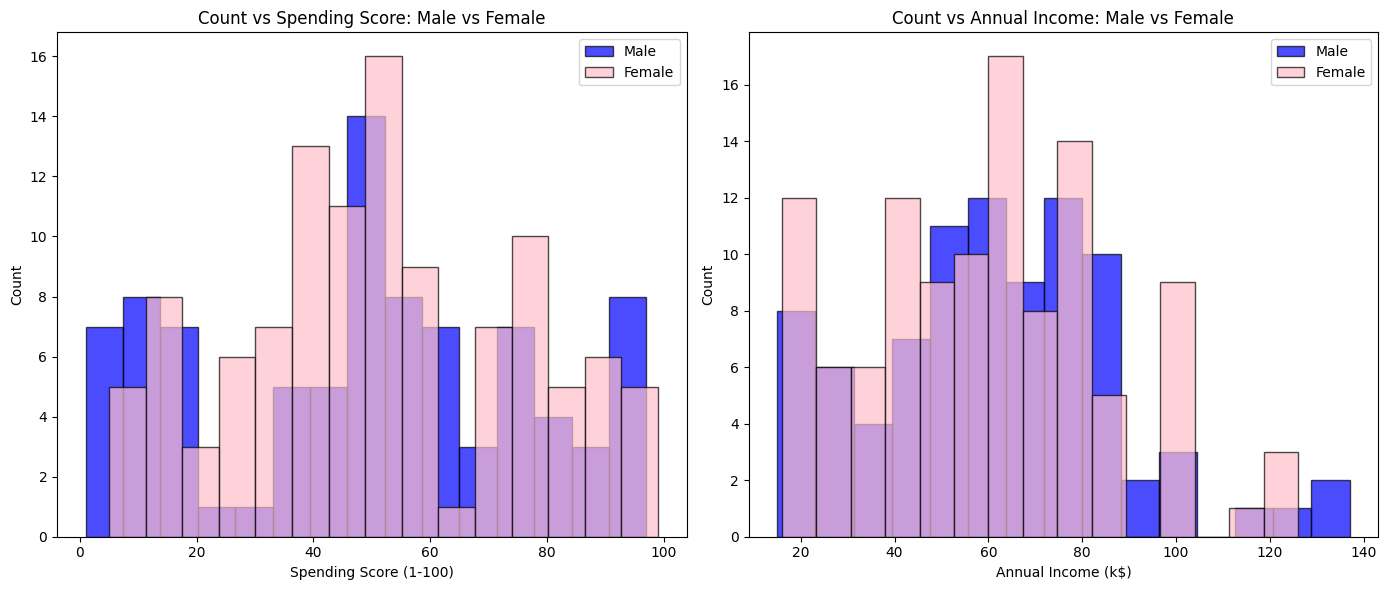

In [ ]:
mall_customers['Gender'] = mall_customers['Gender'].map({'Male': 1, 'Female': 0})

male_customers = mall_customers[mall_customers['Gender'] == 1]
female_customers = mall_customers[mall_customers['Gender'] == 0]

plt.figure(figsize=(14, 6))

# histogram Spending Score
plt.subplot(1, 2, 1)
plt.hist(male_customers['Spending Score (1-100)'], bins=15, alpha=0.7, label='Male', color='blue', edgecolor='black')
plt.hist(female_customers['Spending Score (1-100)'], bins=15, alpha=0.7, label='Female', color='pink', edgecolor='black')
plt.title('Count vs Spending Score: Male vs Female')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.legend()

# histogram Annual Income
plt.subplot(1, 2, 2)
plt.hist(male_customers['Annual Income (k$)'], bins=15, alpha=0.7, label='Male', color='blue', edgecolor='black')
plt.hist(female_customers['Annual Income (k$)'], bins=15, alpha=0.7, label='Female', color='pink', edgecolor='black')
plt.title('Count vs Annual Income: Male vs Female')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

# Kmeans Clustering : age vs spending score




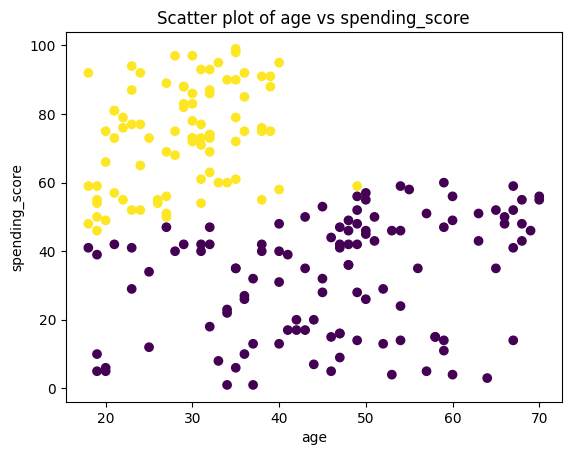

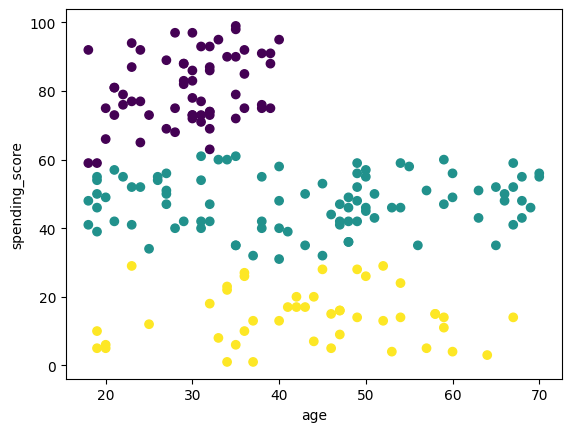

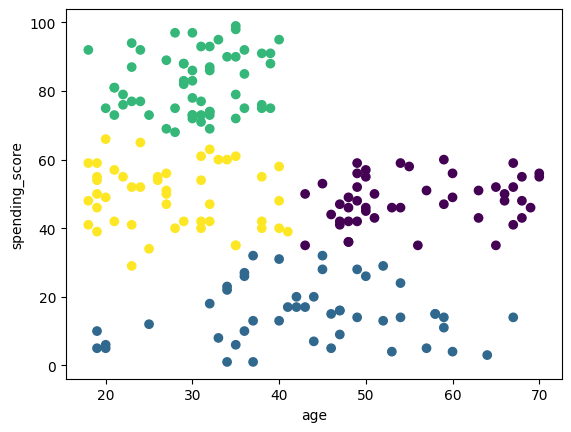

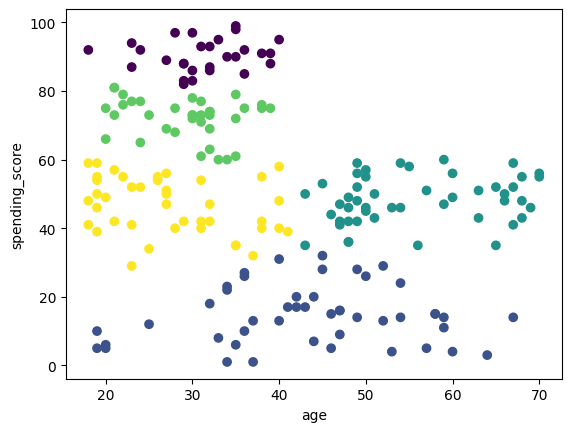

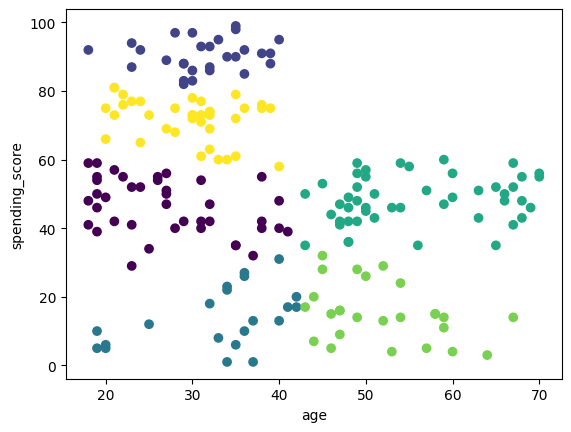

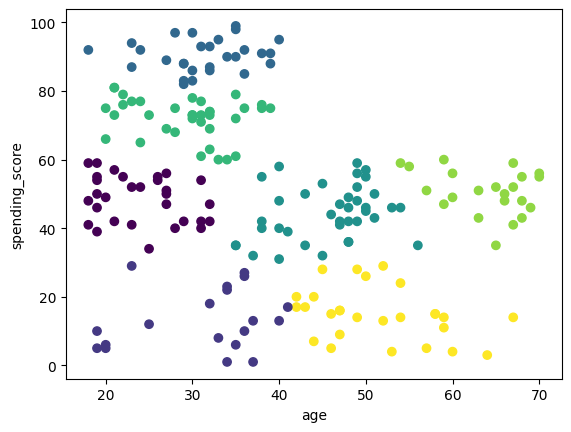

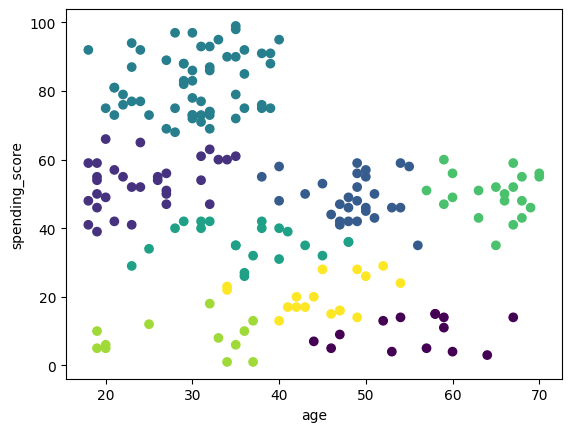

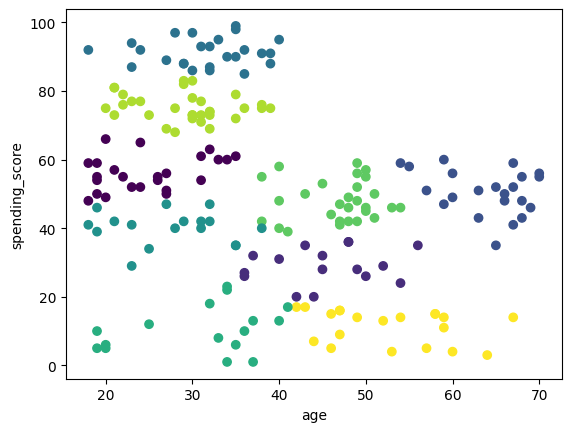

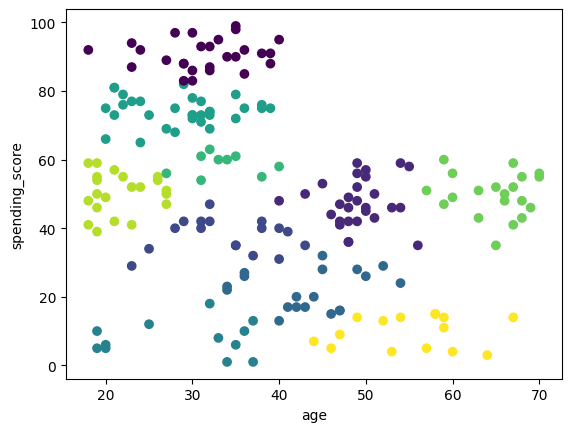

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertias =[] # mean distance between data points and their cluster centroid.
silhouette_scores = []
plt.title('Scatter plot of age vs spending_score')
for i in range(2,11):
  data = list(zip(age, spending_score))
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)

  inertias.append(kmeans.inertia_)


  score = silhouette_score(data, kmeans.labels_)
  silhouette_scores.append(score)
  plt.scatter(age, spending_score, c=kmeans.labels_)

  plt.xlabel('age')
  plt.ylabel('spending_score')
  plt.show()

**Elbow method for age vs spending_score clustering, ELBOW POINT K = 4**

**Silhouette Coefisient for age vs spending_score clustering = 0.5**

KESIMPULAN K OPTIMAL = 4

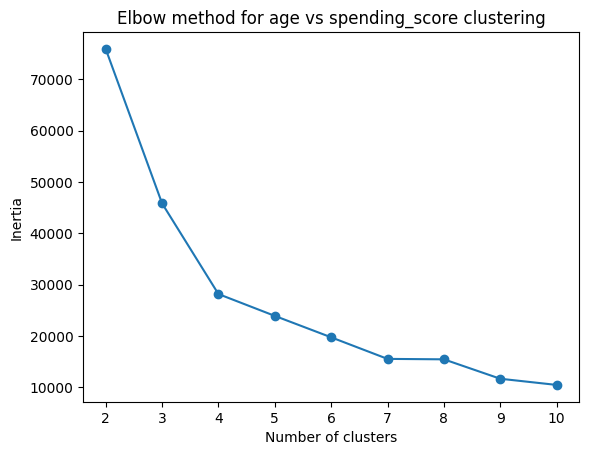

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

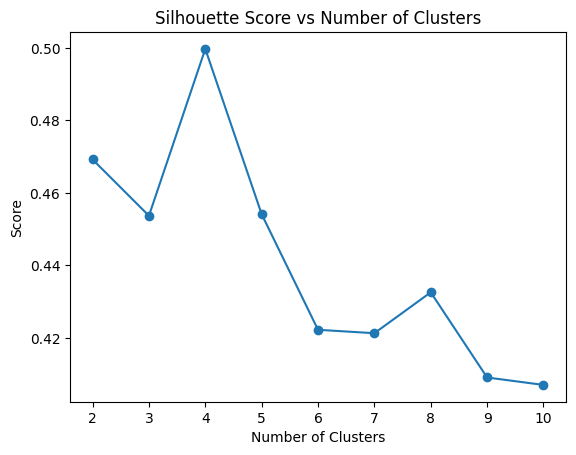

In [ ]:
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method for age vs spending_score clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score vs Number of Clusters')

# Kmeans Clustering :  Income vs Spending Score


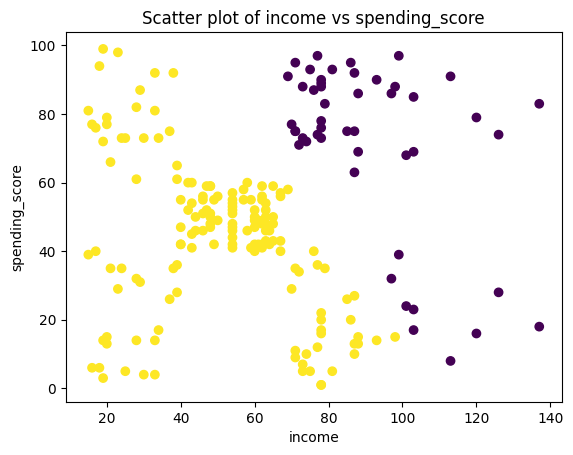

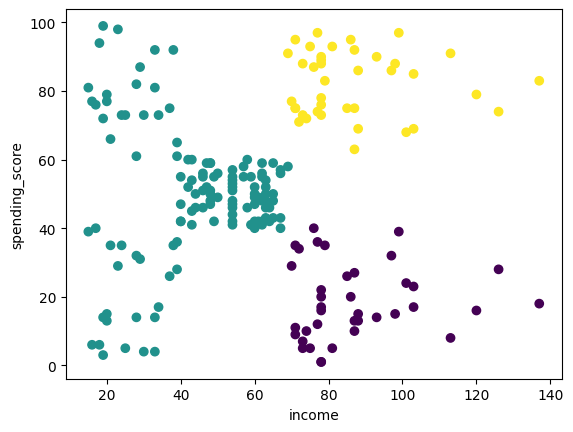

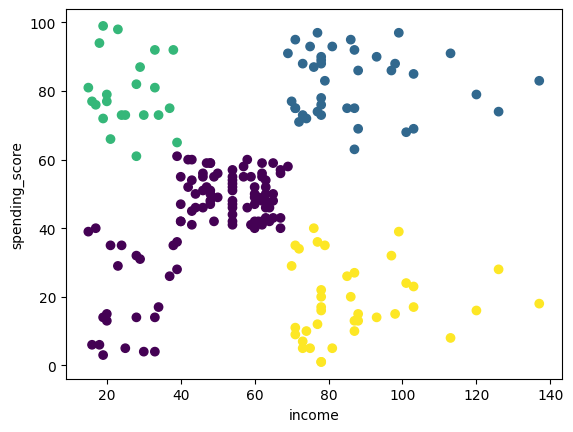

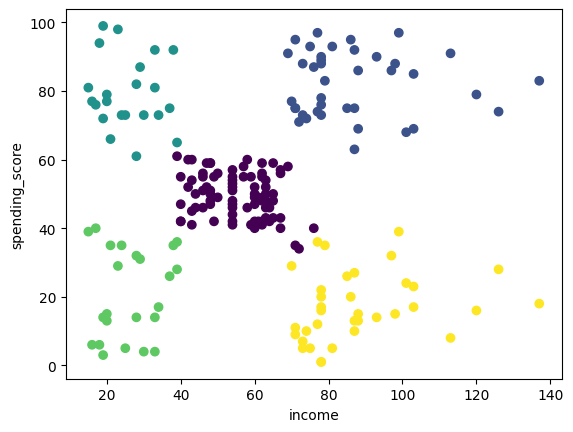

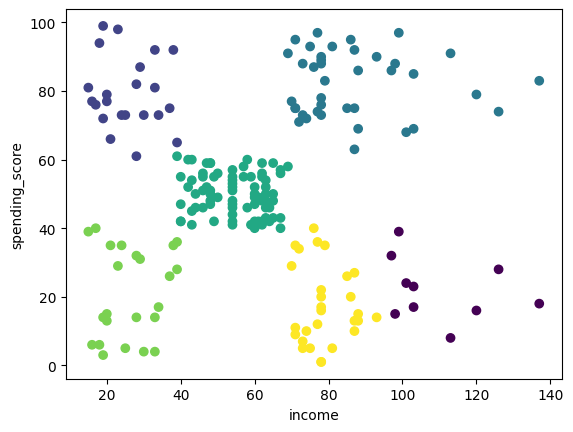

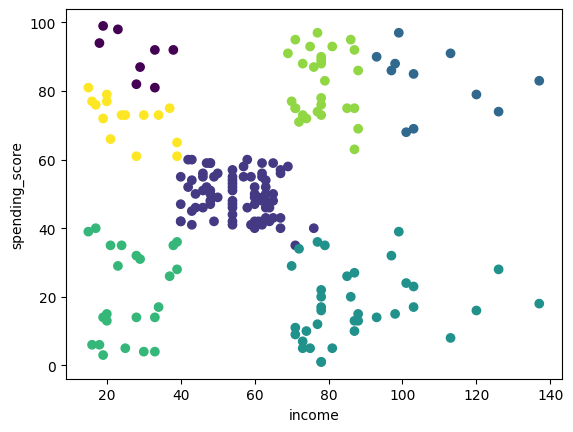

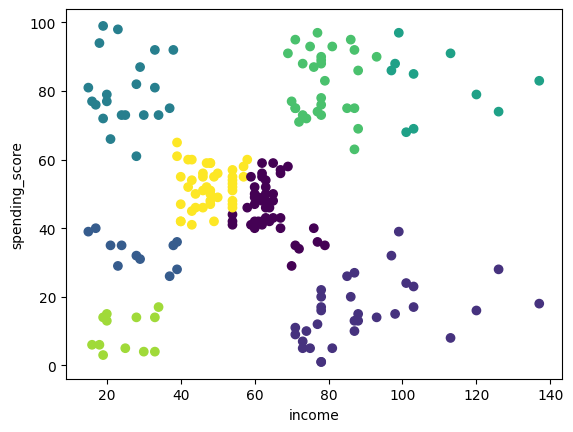

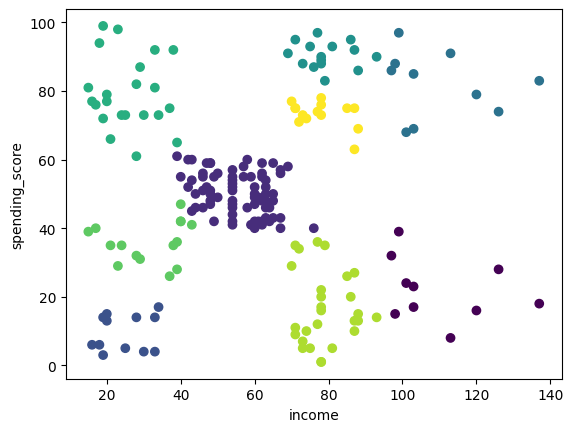

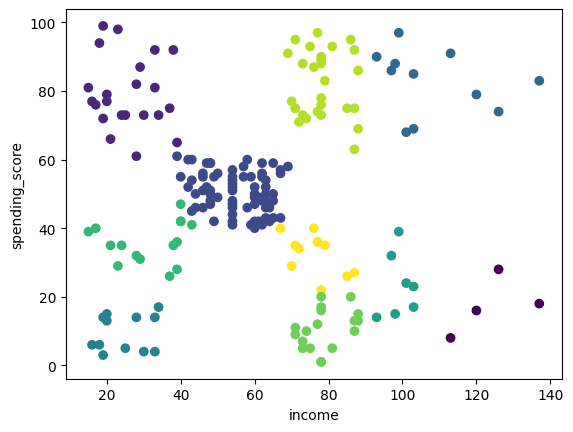

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertias =[] # mean distance between data points and their cluster centroid.
silhouette_scores = []
plt.title('Scatter plot of income vs spending_score')
for i in range(2,11):
  data = list(zip(income, spending_score))
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)

  inertias.append(kmeans.inertia_)


  score = silhouette_score(data, kmeans.labels_)
  silhouette_scores.append(score)
  plt.scatter(income, spending_score, c=kmeans.labels_)

  plt.xlabel('income')
  plt.ylabel('spending_score')
  plt.show()

**Elbow method for income vs spending_score clustering, ELBOW POINT K = 5**

**Silhouette Coefisient for income vs spending_score clustering = 0.550**

KESIMPULAN K OPTIMAL = 5

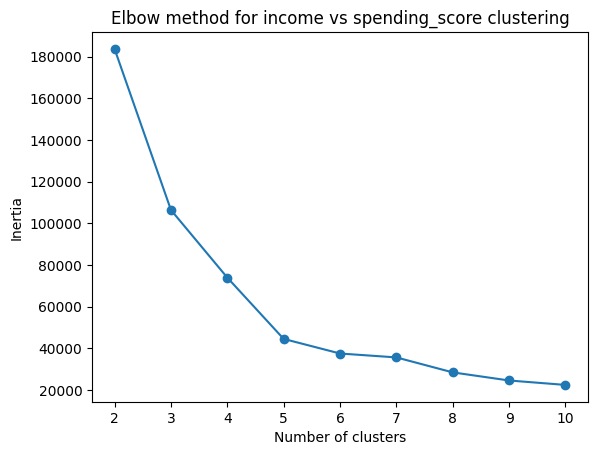

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

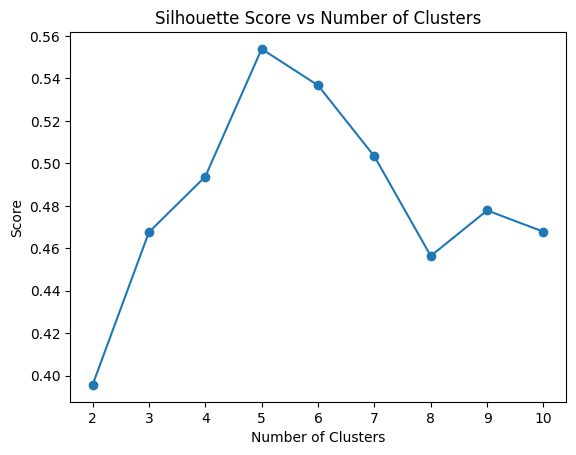

In [ ]:
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method for income vs spending_score clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score vs Number of Clusters')

# **KESIMPULAN KMEANS**

Berdasarkan analisis dari nilai elbow point dan silhouete dari age vs spending_score dan income vs spending_score, dataset dapat dikelompokkan dan menghasilkan cluster yang relatif baik, terutama untuk income vs spending score. Berdasarkan nilai silhouette yang lebih baik dari pada age vs spending score dapat disimpulkan bahwa cluster yang dihasilkan lebih terdefinisi. Berikutnya, jumlah cluster terbaik yang dihasilkan dari masing-masing kategori adalah: 4 cluster untuk age vs. spending score. 5 cluster untuk income vs. spending score.



1.   Cluster 0

  Centroid:
  *   Annual Income: 55.30k
  *   Spending Score: 49.52
  *   Jumlah Anggota: 81
  *   Rentang Nilai:
      *   Annual Income: 39k - 76k
      *   Spending Score: 34 - 61

  Interpretasi:
  Cluster ini memiliki pelanggan dengan pendapatan menengah dan spending score sedang. Mereka merupakan kelompok yang paling banyak dengan 81 anggota dan memiliki pengeluaran yang seimbang dengan penghasilannya.

2.   Cluster 1

  Centroid:
  *   Annual Income: 86.54k
  *   Spending Score: 82.13
  *   Jumlah Anggota: 39
  *   Rentang Nilai:
      *   Annual Income: 69k - 137k
      *   Spending Score: 63 - 97

  Interpretasi:
  Cluster ini mencakup pelanggan dengan pendapatan tinggi dan spending score tinggi. Mereka menghabiskan uang secara signifikan untuk berbelanja.

3.   Cluster 2

  Centroid:
  *   Annual Income: 25.73k
  *   Spending Score: 79.36
  *   Jumlah Anggota: 22
  *   Rentang Nilai:
      *   Annual Income: 15k - 39k
      *   Spending Score: 61 - 99

  Interpretasi:
  Cluster ini terdiri dari pelanggan dengan pendapatan rendah tetapi memiliki spending score tinggi, yang menunjukkan bahwa meskipun penghasilan mereka rendah, mereka tetap gemar berbelanja.

4.   Cluster 3

  Centroid:
  *   Annual Income: 88.20k
  *   Spending Score: 17.11
  *   Jumlah Anggota: 35
  *   Rentang Nilai:
      *   Annual Income: 70k - 137k
      *   Spending Score: 1 - 39

  Interpretasi:
  Cluster ini mencakup pelanggan dengan pendapatan tinggi tetapi memiliki spending score rendah, yang berarti mereka mungkin kaya tetapi hemat.

5.   Cluster 4

  Centroid:
  *   Annual Income: 26.30k
  *   Spending Score: 20.91
  *   Jumlah Anggota: 23
  *   Rentang Nilai:
      *   Annual Income: 15k - 39k
      *   Spending Score: 3 - 40

  Interpretasi:
  Cluster ini mencakup pelanggan dengan pendapatan rendah dan spending score rendah, yang mungkin merupakan kelompok yang paling sensitif terhadap harga.

In [ ]:

data = list(zip(income, spending_score))
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.labels_

mall_customers['Cluster'] = cluster_labels
centroids = mall_customers.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(centroids)

cluster_counts = mall_customers['Cluster'].value_counts()
print(cluster_counts)

cluster_ranges = mall_customers.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['min', 'max'])
print(cluster_ranges)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64
        Annual Income (k$)      Spending Score (1-100)    
                       min  max                    min max
Cluster                                                   
0                       39   76                     34  61
1                       69  137                     63  97
2                       15   39                     61  99
3                       70  137                      1  39
4                       15   39                      3  40




# **B. Pengelompokan Dataset dengan Agglomerative**



In [ ]:
data = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']].values

# **Visualisasi Dendogram**

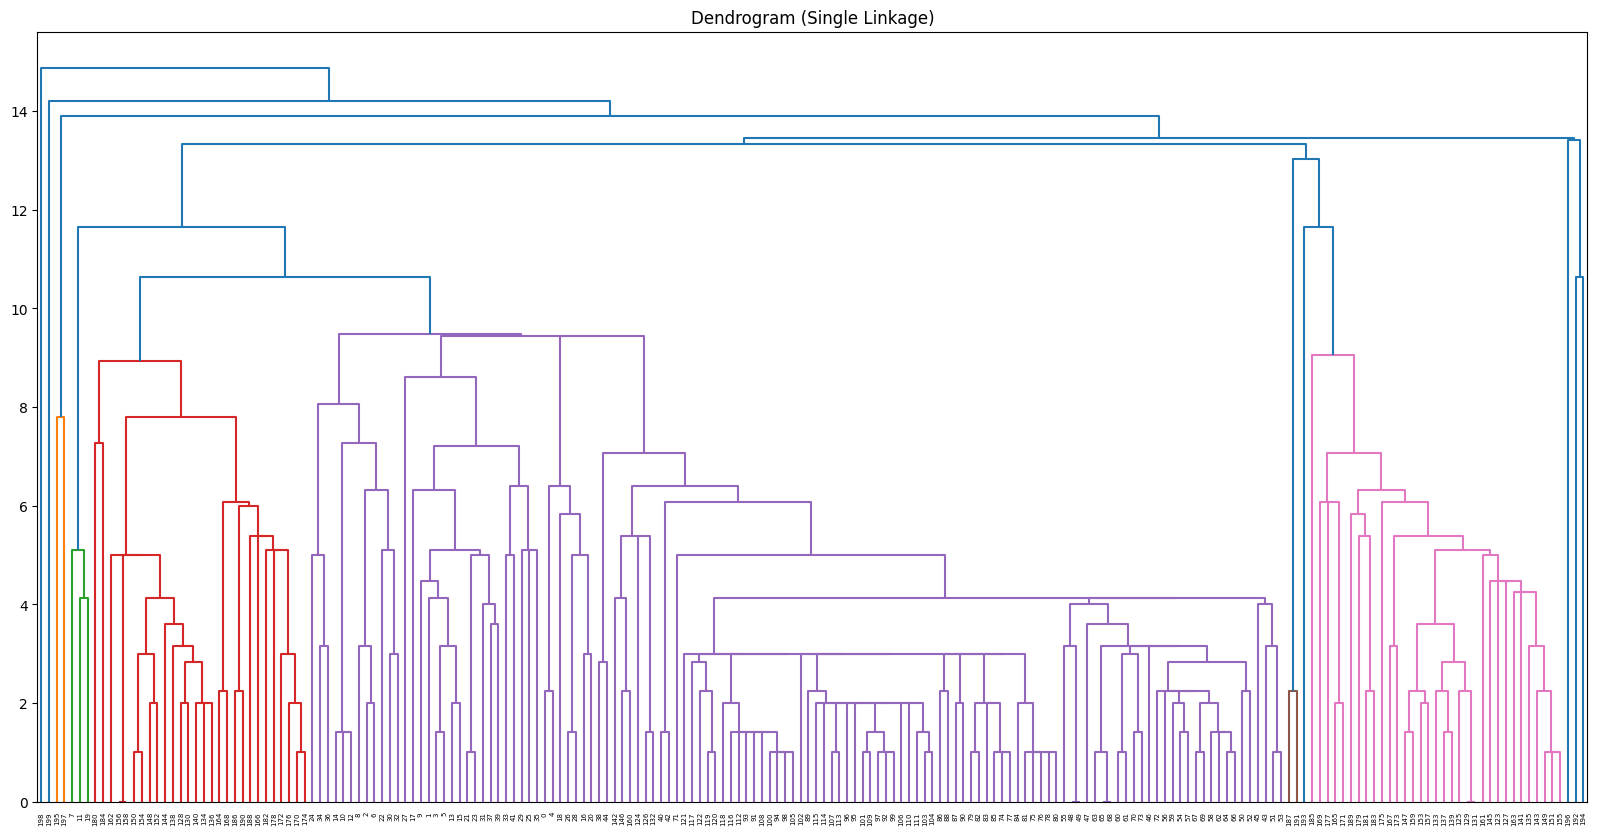

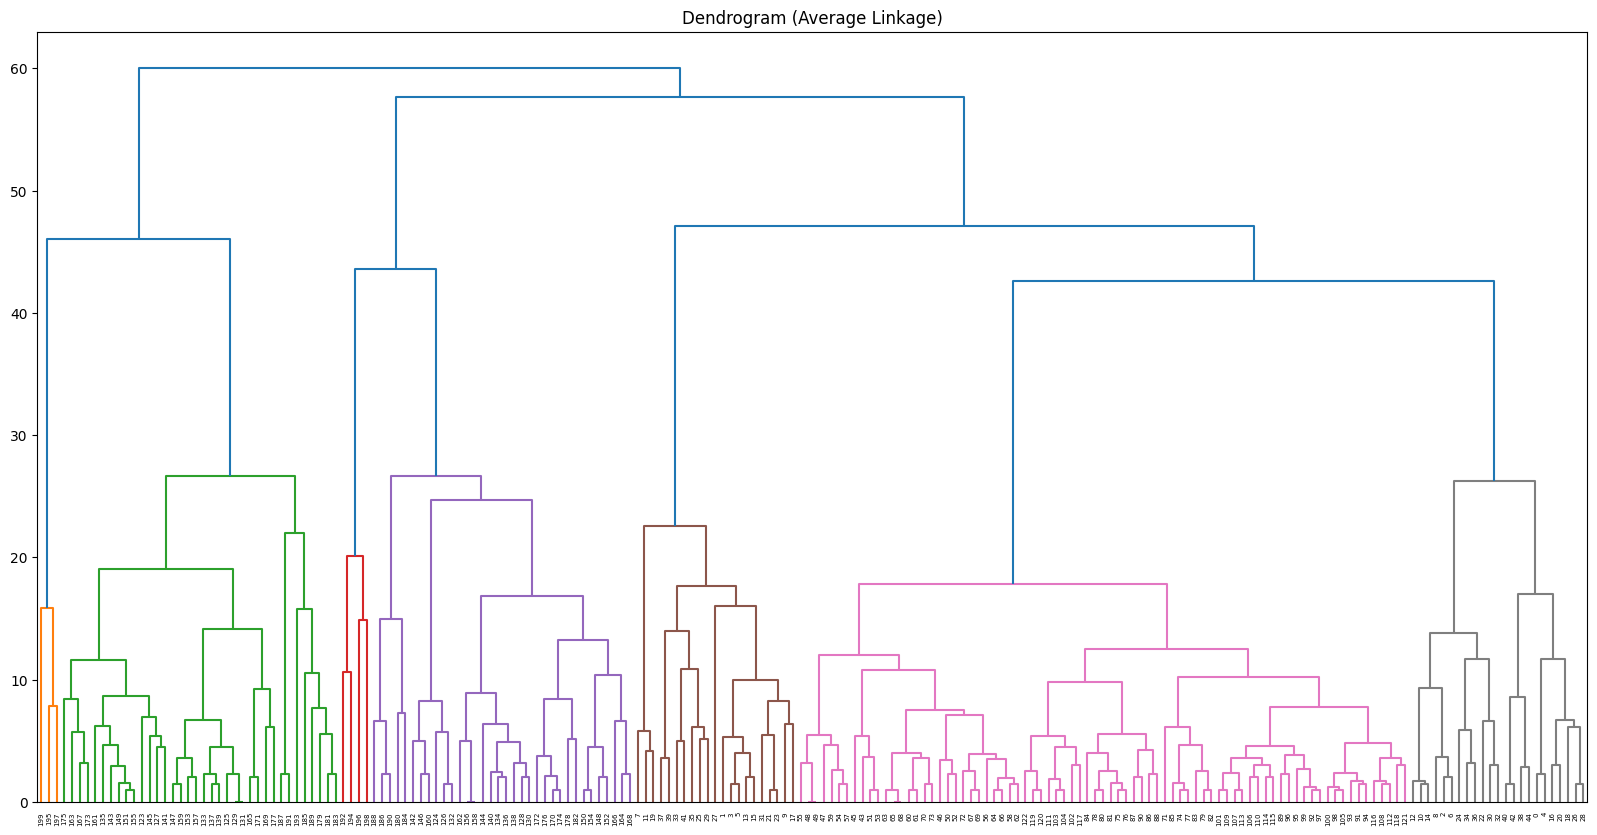

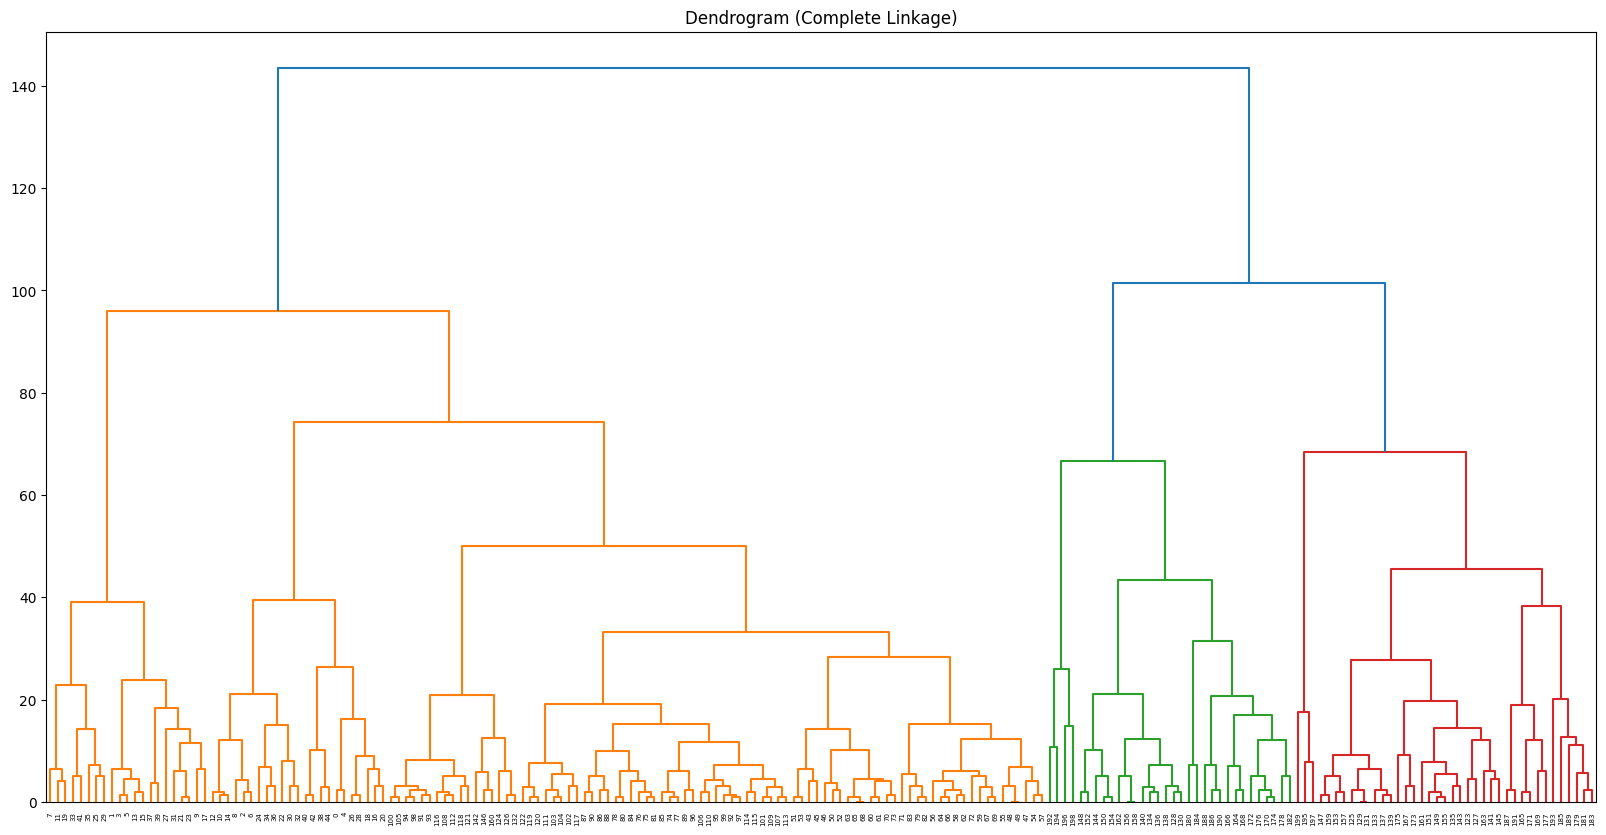

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Single linkage
Z_single = linkage(data, method='single')
plt.figure(figsize=(20, 10))
plt.title("Dendrogram (Single Linkage)")
dendrogram(Z_single)
plt.show()

# Average linkage
Z_average = linkage(data, method='average')
plt.figure(figsize=(20, 10))
plt.title("Dendrogram (Average Linkage)")
dendrogram(Z_average)
plt.show()

# Complete linkage
Z_complete = linkage(data, method='complete')
plt.figure(figsize=(20, 10))
plt.title("Dendrogram (Complete Linkage)")
dendrogram(Z_complete)
plt.show()



1.   Single Lingkage:

      Skor koefisien silhouette menurun seiring bertambahnya jumlah cluster, dengan skor tertinggi pada k = 2 (0.436). Ini menunjukkan bahwa dengan metode single linkage, model lebih cocok dengan sedikit cluster, namun kualitas cluster tidak terlalu tinggi.
2.   Average Linkage:

      Skor koefisien silhouette tertinggi tercapai pada k = 7 (0.539), menunjukkan bahwa dengan average linkage, jumlah cluster terbaik adalah 6. Skor ini cukup tinggi, menunjukkan bahwa cluster yang dihasilkan memiliki kualitas yang baik.
3.   Complete Linkage:

      Skor koefisien silhouette tertinggi ditemukan pada k = 5 (0.553), yang menunjukkan bahwa dengan complete linkage, model memberikan cluster yang kompak dan terpisah dengan baik pada jumlah cluster 4.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

silhouette_scores_single = []
silhouette_scores_average = []
silhouette_scores_complete = []

# mengelompokkan dan menghitung koefisien Silhouette untuk Single Linkage
for k in range(2, 9):
    agglom = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels = agglom.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores_single.append(score)

# mengelompokkan dan menghitung koefisien Silhouette untuk Average Linkage
for k in range(2, 9):
    agglom = AgglomerativeClustering(n_clusters=k, linkage='average')
    labels = agglom.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores_average.append(score)

# mengelompokkan dan menghitung koefisien Silhouette untuk Complete Linkage
for k in range(2, 9):
    agglom = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = agglom.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores_complete.append(score)

# menampilkan hasil koefisien Silhouette
print("Single Linkage Silhouette Scores:", silhouette_scores_single)
print("Average Linkage Silhouette Scores:", silhouette_scores_average)
print("Complete Linkage Silhouette Scores:", silhouette_scores_complete)


Single Linkage Silhouette Scores: [0.436370757302489, 0.365677402459876, 0.308376596754837, 0.2694896445402342, 0.2579197285327973, 0.2699130235963624, 0.23717545744547613]
Average Linkage Silhouette Scores: [0.3834954980710284, 0.46761358158775435, 0.4953866500175876, 0.4791911539647448, 0.46583987350466116, 0.5394010876310338, 0.5232897502706508]
Complete Linkage Silhouette Scores: [0.36706444723912895, 0.4618340266628975, 0.4916598193892782, 0.5529945955148897, 0.5436661823351217, 0.5372198707490682, 0.4309283152153387]


In [ ]:
# menentukan jumlah cluster terbaik dari masing-masing metode berdasarkan koefisien silhouette
best_k_single = np.argmax(silhouette_scores_single) + 2  # ini tambah 2 karena range dimulai dari 2
best_k_average = np.argmax(silhouette_scores_average) + 2
best_k_complete = np.argmax(silhouette_scores_complete) + 2

print("Best number of clusters for Single Linkage:", best_k_single)
print("Best number of clusters for Average Linkage:", best_k_average)
print("Best number of clusters for Complete Linkage:", best_k_complete)


Best number of clusters for Single Linkage: 2
Best number of clusters for Average Linkage: 7
Best number of clusters for Complete Linkage: 5


Berdasarkan hasil analisa dari rata-rata nilai silhouette dari setiap cluster pada setiap linkage, complete linkage dengan jumlah cluster = 5 memiliki rata-rata nilai silhouette paling tinggi. Sehingga untuk mengelompokan dataset Mall Customer akan diggunakan complete linkage dengan jumlah cluster = 5.

In [ ]:
# membuat salinan dari data frame awal sebelum di ubah
mall_customers_copy = mall_customers.copy()

# konversi kolom Gender menjadi numerik pada salinan
mall_customers_copy['Gender'] = mall_customers_copy['Gender'].map({'Male': 0, 'Female': 1})

# mengelompokkan dengan jumlah cluster terbaik dari Complete Linkage
agglom_complete = AgglomerativeClustering(n_clusters=best_k_complete, linkage='complete')
labels_complete = agglom_complete.fit_predict(data)

# menambahkan label hasil cluster ke dalam dataframe salinan
mall_customers_copy['Cluster'] = labels_complete

# mencari pola dari setiap kelompok (centroid, jumlah anggota, rentang nilai)
centroids = mall_customers_copy.groupby('Cluster').mean()
counts = mall_customers_copy['Cluster'].value_counts()
ranges = mall_customers_copy.groupby('Cluster').agg({'Annual Income (k$)': ['min', 'max'],
                                                     'Spending Score (1-100)': ['min', 'max']})

print("Centroids:\n", centroids)
print("\nJumlah anggota tiap cluster:\n", counts)
print("\nRentang nilai tiap atribut:\n", ranges)


Centroids:
          CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        162.000000  0.538462  32.692308           86.538462   
1         87.894118  0.600000  42.482353           55.811765   
2        166.250000  0.437500  41.000000           89.406250   
3         22.000000  0.571429  25.333333           25.095238   
4         23.000000  0.608696  45.217391           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     82.128205  
1                     49.129412  
2                     15.593750  
3                     80.047619  
4                     20.913043  

Jumlah anggota tiap cluster:
 Cluster
1    85
0    39
2    32
4    23
3    21
Name: count, dtype: int64

Rentang nilai tiap atribut:
         Annual Income (k$)      Spending Score (1-100)    
                       min  max                    min max
Cluster                                         

1.   Cluster 0

  Centroid:
  *   Annual Income: 86.54k
  *   Spending Score: 82.13
  *   Jumlah Anggota: 39
  *   Rentang Nilai:
      *   Annual Income: 69k - 137k
      *   Spending Score: 63 - 97

2.   Cluster 1

  Centroid:
  *   Annual Income: 55.81k
  *   Spending Score: 49.12
  *   Jumlah Anggota: 85
  *   Rentang Nilai:
      *   Annual Income: 39k - 79k
      *   Spending Score: 29 - 65

3.   Cluster 2

  Centroid:
  *   Annual Income: 89.4k
  *   Spending Score: 15.59
  *   Jumlah Anggota: 32
  *   Rentang Nilai:
      *   Annual Income: 71k - 137k
      *   Spending Score: 1 - 39

4.   Cluster 3

  Centroid:
  *   Annual Income: 25.0k
  *   Spending Score: 80.0
  *   Jumlah Anggota: 21
  *   Rentang Nilai:
      *   Annual Income: 15k - 38k
      *   Spending Score: 61 - 99

5.   Cluster 4

  Centroid:
  *   Annual Income: 26.30k
  *   Spending Score: 20.9
  *   Jumlah Anggota: 23
  *   Rentang Nilai:
      *   Annual Income: 15k - 39k
      *   Spending Score: 3 - 40

# **C. Perbandingan k-Means vs Agglomerative**



1.   Waktu eksekusi:

      K-Means memiliki kompleksitas waktu sekitar 𝑂 ( 𝑛 ⋅ 𝑘 ⋅ 𝑖 ), di mana 𝑛 adalah jumlah data, 𝑘 adalah jumlah cluster, dan 𝑖 adalah jumlah iterasi hingga konvergensi. Ini dapat membuat K-Means lebih lambat jika jumlah iterasi tinggi.

      Agglomerative Clustering memiliki kompleksitas waktu yang lebih tinggi pada umumnya, yaitu 𝑂 ( 𝑛 3 ) dalam versi sederhana.

2.   Hasil Pengelompokan:

      K-Means menghasilkan centroid yang merepresentasikan rata-rata dari setiap cluster, yang lebih sensitif terhadap outlier. Oleh karena itu K-Means memberikan hasil yang lebih konsisten pada data yang berbentuk bulat, sedangkan Agglomerative Clustering lebih baik dalam menangani struktur data yang kompleks dengan pola yang lebih bervariasi.


Kesimpulan : Agglomerative lebih cepat dibandingkan dengan kmeans karena agglomerative dimulai dair bawah dan akan berhenti pada sebuah titik (jumlah kluster) yang optimal, sedangkan kmeans membutuhkan proses iteratif untuk setiap kluster. Agglomerative mulai dari jumlah kluster yang banyak, kemudian secara berkala akan berkurnag hingga mencapai satu titik optimal, sedangkan k means harus mencoba seluruh kemungkinan jumlah kluster yang telah kita tentukan (misalnya dari 2-9 inklusif) padahal mungkin saja yang jumlah kluster optimal bukanlah k yang tinggi (mis : k optimal = 4, tetapi proses iterasi tetap dilakukan sampai 9)


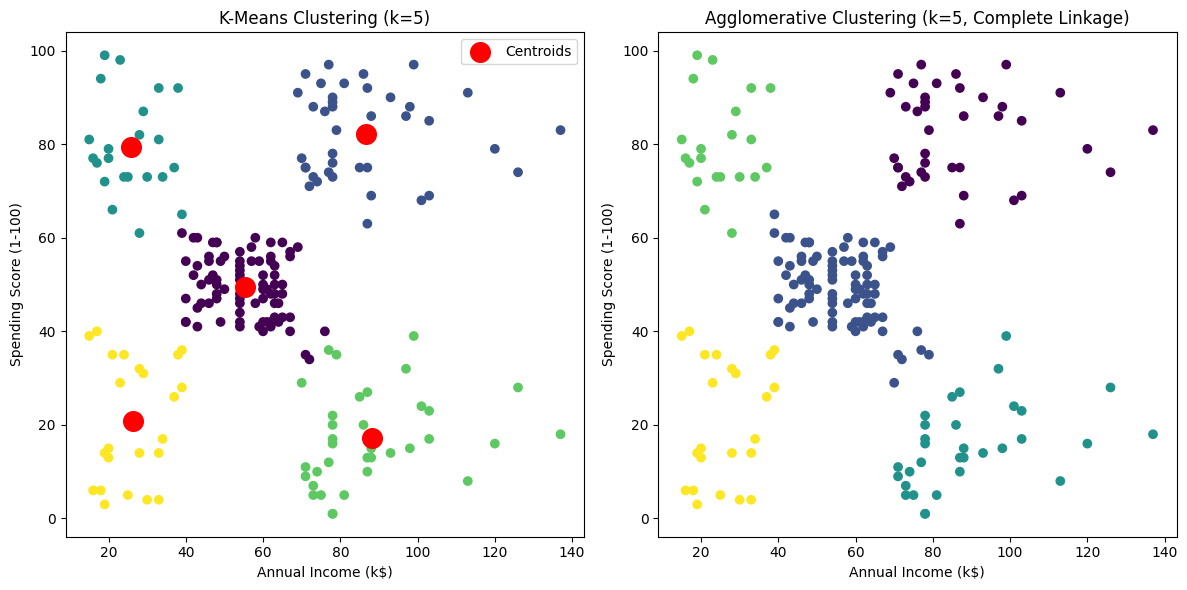

K-Means Execution Time: 0.0069 seconds
Agglomerative Clustering Execution Time: 0.0021 seconds


In [ ]:
import time

# menyiapkan data untuk clustering
data = np.array(list(zip(income, spending_score)))

# K-Means
start_time_kmeans = time.time()  # Mulai pengukuran waktu
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
end_time_kmeans = time.time()  # Menghentikan pengukuran waktu

# Agglomerative Clustering
start_time_agglo = time.time()  # Mulai pengukuran waktu
agglo = AgglomerativeClustering(n_clusters=5, linkage='complete')
agglo_labels = agglo.fit_predict(data)
end_time_agglo = time.time()  # Menghentikan pengukuran waktu

# visualisasi
plt.figure(figsize=(12, 6))

# Visualisasi K-Means
plt.subplot(1, 2, 1)
plt.scatter(income, spending_score, c=kmeans_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Visualisasi Agglomerative Clustering
plt.subplot(1, 2, 2)
plt.scatter(income, spending_score, c=agglo_labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering (k=5, Complete Linkage)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Output Waktu dan Silhouette Score
print(f"K-Means Execution Time: {end_time_kmeans - start_time_kmeans:.4f} seconds")
print(f"Agglomerative Clustering Execution Time: {end_time_agglo - start_time_agglo:.4f} seconds")